## First order ODE:
$$ \frac{dy}{dx} + p(x) \cdot y = f(x) $$
$$ x \in [0,1] $$
$$ y(0) = A $$

## Solving ODE:
Finding the solution for the differential equation is the same as minimizing loss function \(\min\{ \mathcal{L} \}\), where the loss function is defined as:
$$ \mathcal{L} = \int_0^1 \left( \frac{dy}{dx} - f(x) \right)^2 dx $$

## Neural Networks
$$ y \approx \mathcal{N}(x) $$

## 네트워크 구조

In [36]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        layer_out = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(layer_out)
        return output

### 손실 함수

#### Example Function and BC
$$
\begin{cases}
f(x) = e^x \\
p(x) = 0
\end{cases}
$$
$$
y(0) = 1
$$

#### Exact Solution
$$
y = e^x
$$

##### Loss function:
$$ MSE = MSE_f + MSE_u $$

where
$$ MSE_f = \frac{1}{N_f} \sum_{i=1}^{N_f} \left( \left. \frac{d\mathcal{N}(x)}{dx} \right|_{x = x_i} - f(x_i) \right)^2 $$
and
$$ MSE_u = \frac{1}{N_u} \sum_{i=1}^{N_u} \left( \mathcal{N}(x_i) - y(x_i) \right)^2 $$

In [20]:
def f(x):
    return torch.exp(x)

def loss(network, x):
    x.requires_grad = True
    y_pred = network(x)
    dy_dx = torch.autograd.grad(y_pred.sum(), x, create_graph=True)[0]
    
    mse_f = torch.mean((dy_dx - f(x))**2 )
    mse_u = (y_pred[0, 0] - 1.0)**2             ## 시작점은 제공해야함.
    
    return mse_f + mse_u

""" LBFGS 사용 시 closure 선언 필요 """
def closure(opt_, net_, x_):
    opt_.zero_grad()
    l = loss(net_, x_)
    l.backward()
    return l

In [27]:
net = Network()
optimizer = torch.optim.LBFGS(net.parameters())
x = torch.linspace(0, 1, 100)[:, None]

epochs = 10
for i in range(epochs):
    loss_ = optimizer.step(lambda: closure(optimizer, net, x))
    print(loss_)

tensor(5.9445, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(1.8779e-05, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)
tensor(3.6231e-06, grad_fn=<AddBackward0>)


### Test

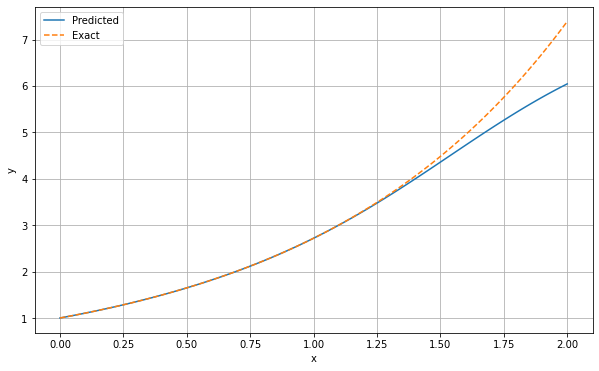

In [32]:
xx = torch.linspace(0, 2, 100)[:, None]
with torch.no_grad():
    yy = net(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, torch.exp(xx), '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

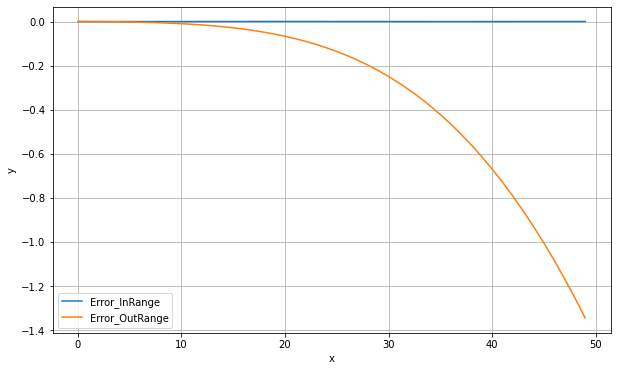

In [35]:
error = yy - torch.exp(xx)
plt.figure(figsize=(10, 6))
plt.plot(error[:50], label="Error_InRange")
plt.plot(error[50:], label="Error_OutRange")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# 결론

- Boundary 조건 초과 시 발산